In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [4]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [5]:
df.shape

(1000, 40)

we have 1000 rows and 40 columns in this dataset.

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In this dataset 39 features and 1 target variable.

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We have int types,object types and float types of values which are independent variable and the fraud_reported is our target variable in this dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There doesn't seem to be need to change column data types except for policy_bind_date which we will convert to datetime type

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

There are two unique values in df[fraud_reported].

In [11]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In this dataset N column has most values as compared to Y column. 
 N column has 753 values.
 N column has 247 values. 

In [12]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

# EDA

univariate analysis

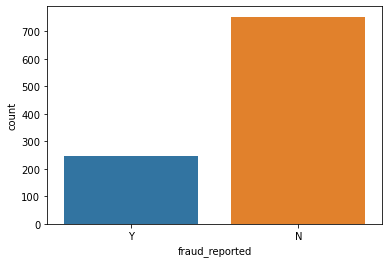

In [12]:
sns.countplot(df["fraud_reported"]);

Data is very imbalanced.

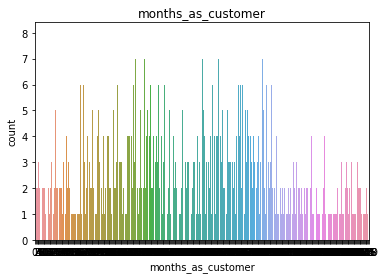

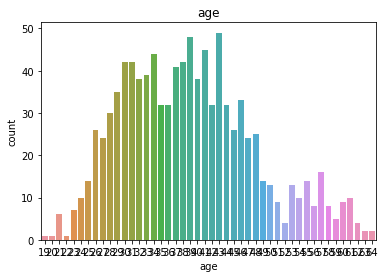

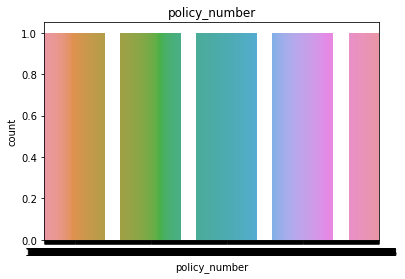

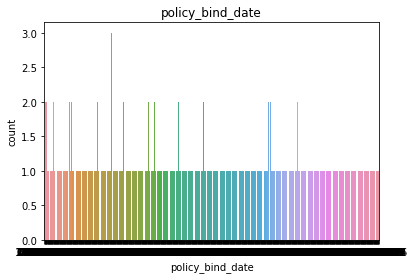

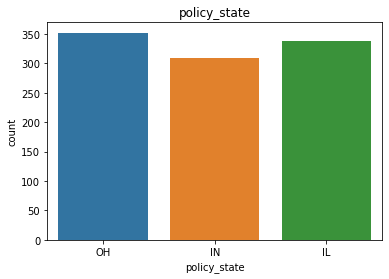

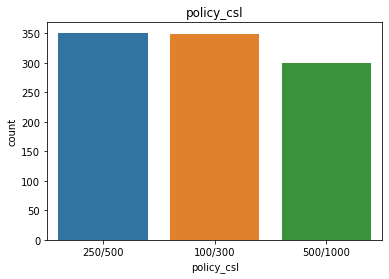

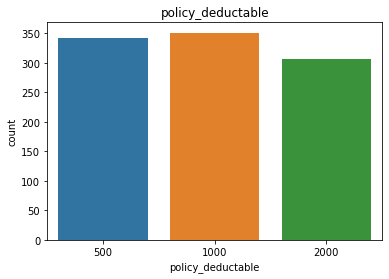

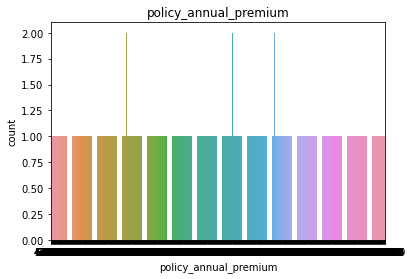

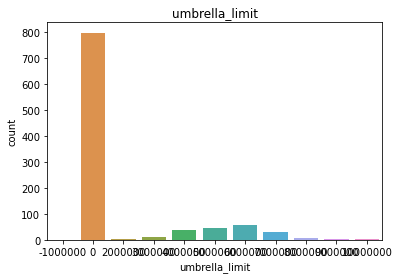

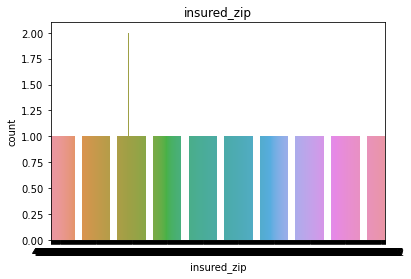

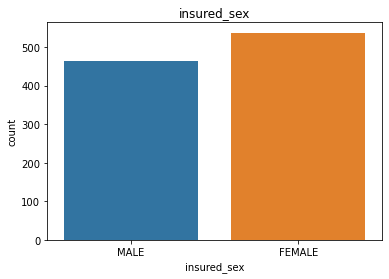

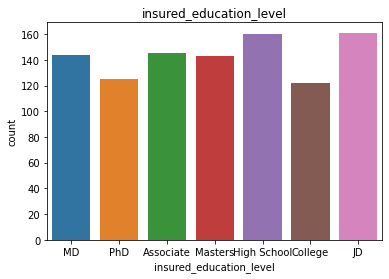

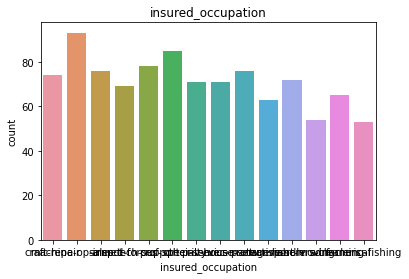

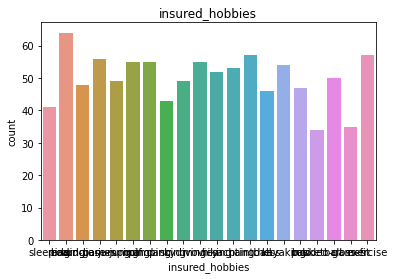

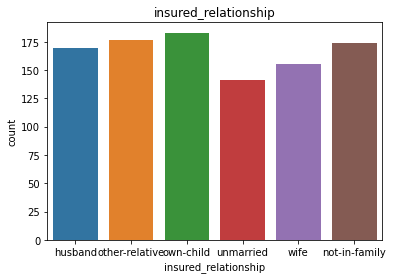

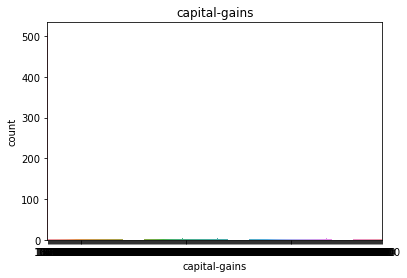

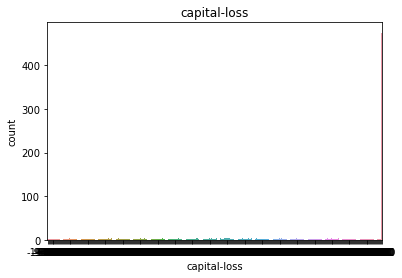

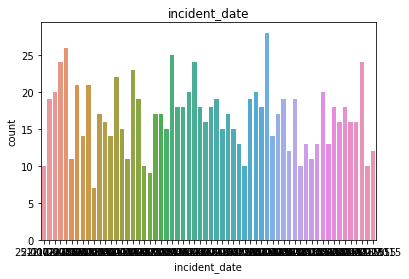

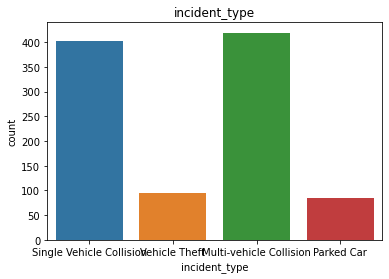

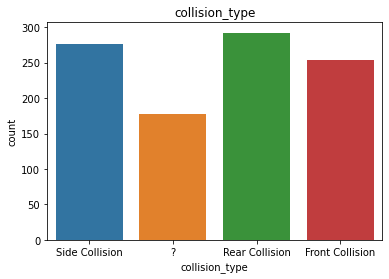

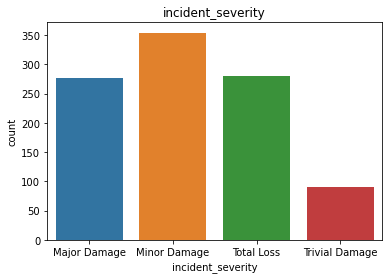

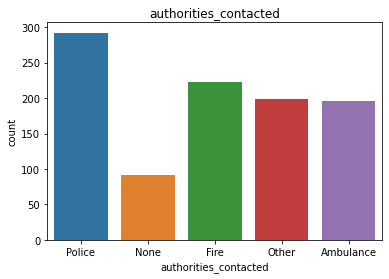

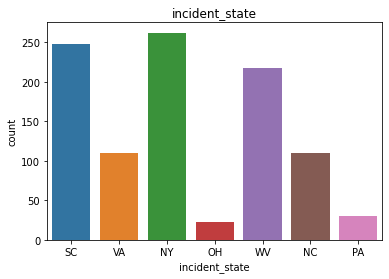

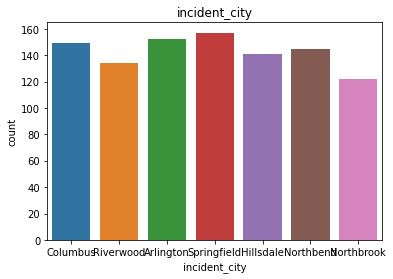

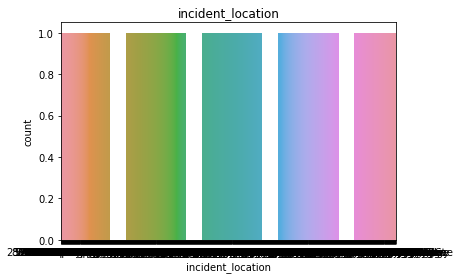

In [13]:
for col in ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location']:
    sns.countplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

In this dataset this plot shows the what value is high in these columns.

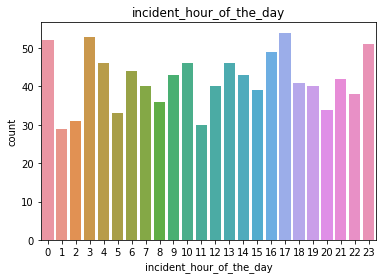

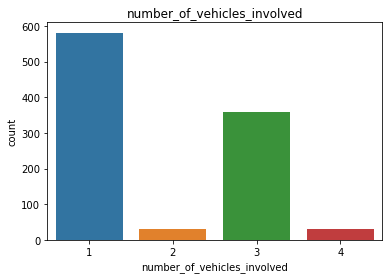

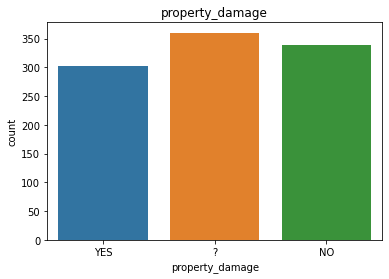

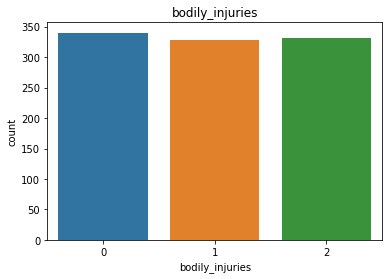

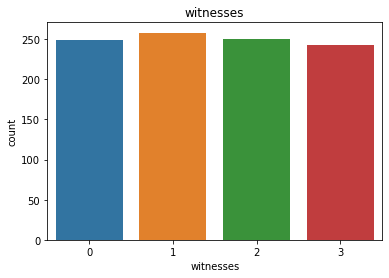

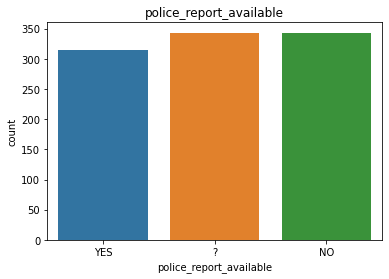

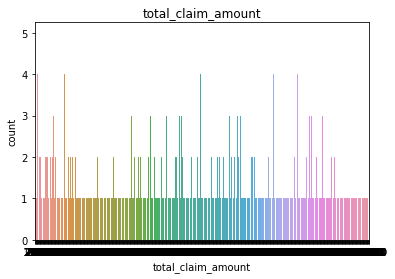

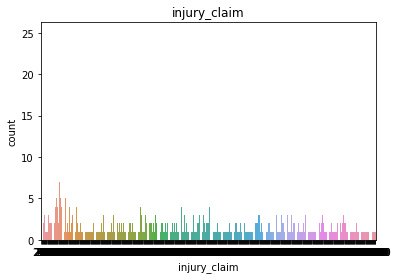

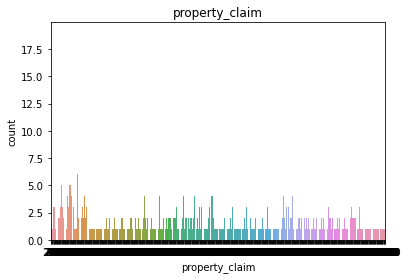

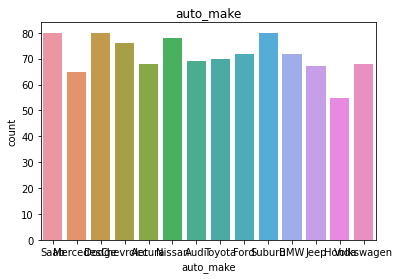

ValueError: min() arg is an empty sequence

In [15]:
for col in ['incident_hour_of_the_day','number_of_vehicles_involved', 'property_damage', 'bodily_injuries','witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year','_c39']:
    sns.countplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()    

In this dataset this plot shows the what value is high in these columns.

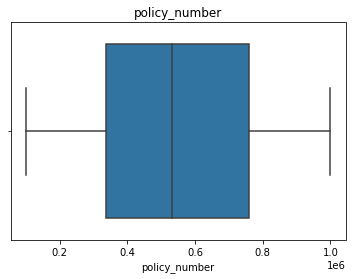

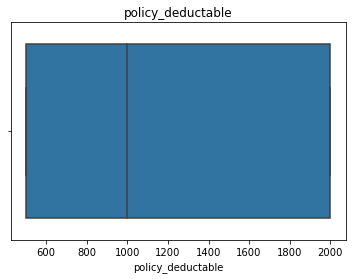

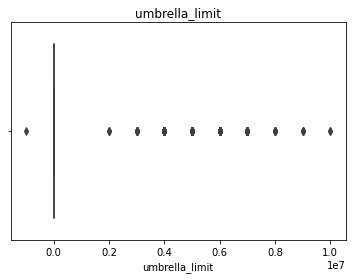

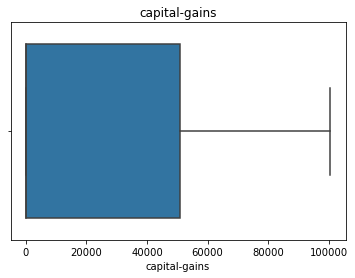

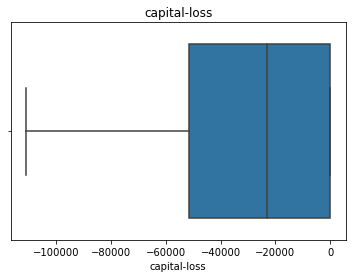

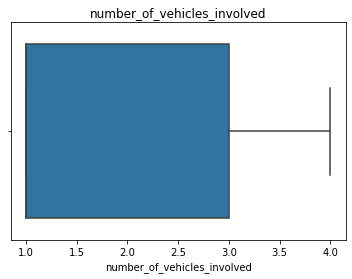

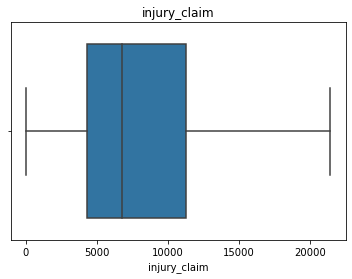

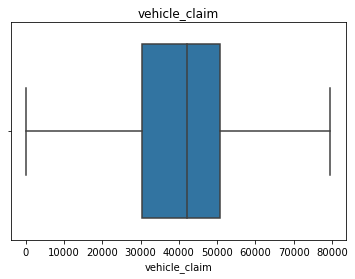

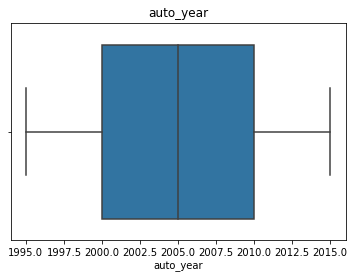

In [16]:
for col in ["months_as_customer","age","policy_number","policy_deductable","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount",
           "injury_claim","property_claim","vehicle_claim","auto_year"]:
    sns.boxplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

In this dataset some columns has outliers are present and some columns has no outliers are present.

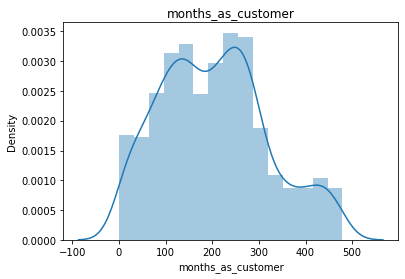

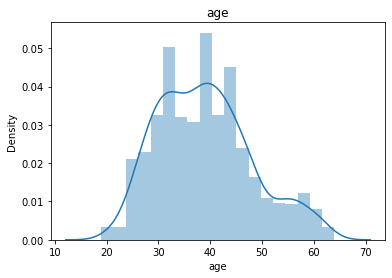

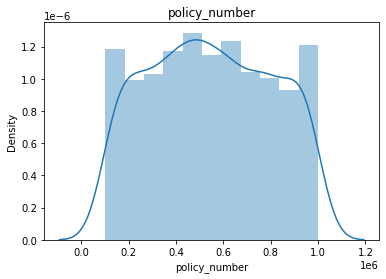

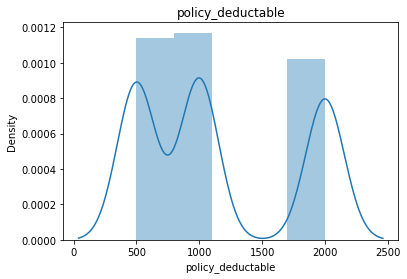

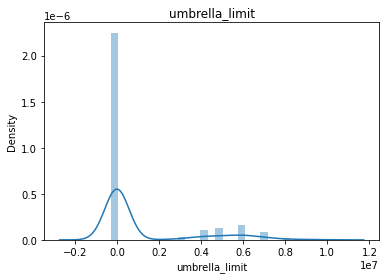

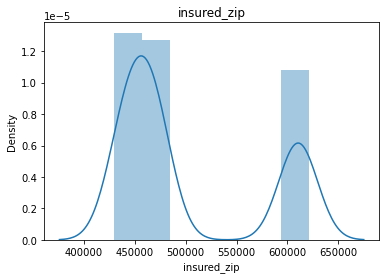

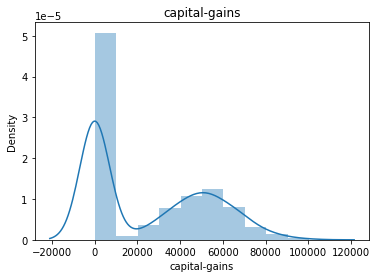

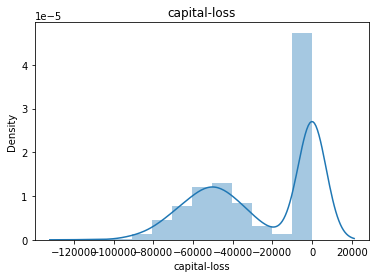

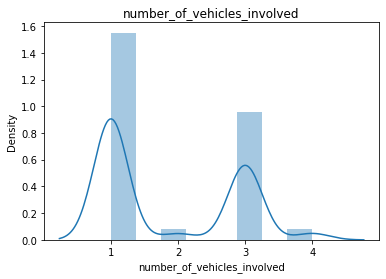

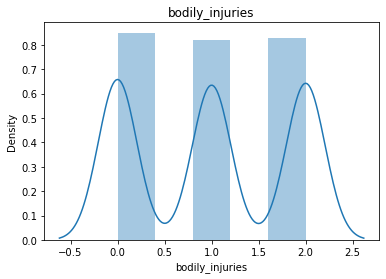

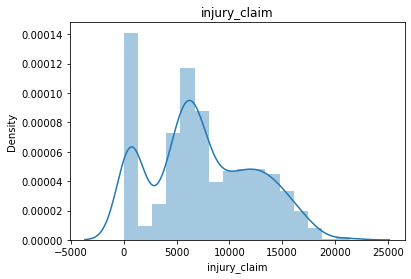

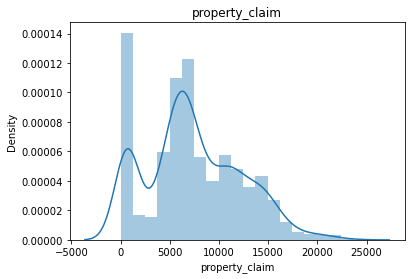

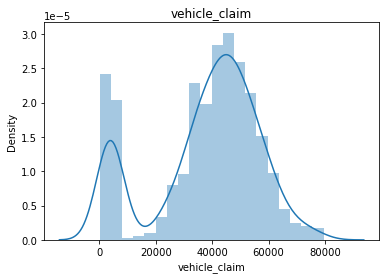

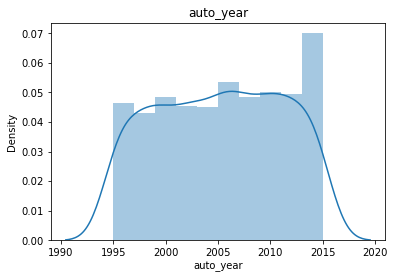

In [17]:
for col in ["months_as_customer","age","policy_number","policy_deductable","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount",
           "injury_claim","property_claim","vehicle_claim","auto_year"]:
    sns.distplot(df[col].dropna())
    plt.title(col)
    plt.show()

# Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


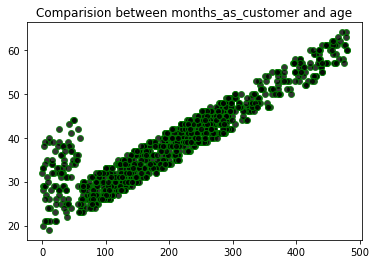

In [18]:
plt.scatter(df["months_as_customer"],df["age"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between months_as_customer and age")
plt.show()

outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


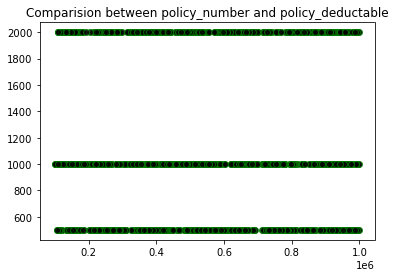

In [19]:
plt.scatter(df["policy_number"],df["policy_deductable"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between policy_number and policy_deductable")
plt.show()

outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


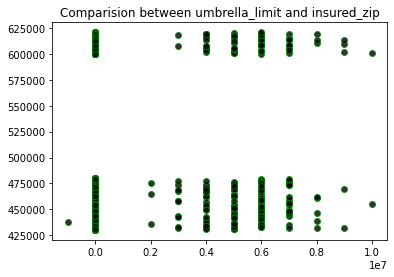

In [20]:
plt.scatter(df["umbrella_limit"],df["insured_zip"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between umbrella_limit and insured_zip")
plt.show()

outliers are present.

In [21]:
plt.scatter(df["capital-gains"],df["capital-loss"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between capital-gains and capital-loss")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


outliers are present.

In [22]:
plt.scatter(df["incident_hour_of_the_day"],df["number_of_vehicles_involved"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between incident_hour_of_the_day and number_of_vehicles_involved")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


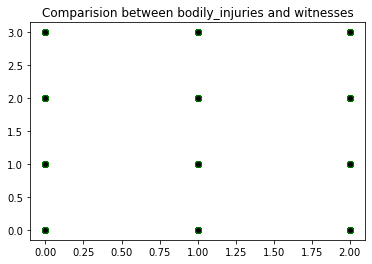

In [23]:
plt.scatter(df["bodily_injuries"],df["witnesses"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between bodily_injuries and witnesses")
plt.show()

outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


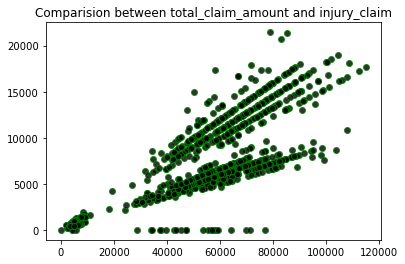

In [24]:
plt.scatter(df["total_claim_amount"],df["injury_claim"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between total_claim_amount and injury_claim")
plt.show()

outliers are present.

In [25]:
plt.scatter(df["property_claim"],df["vehicle_claim"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between property_claim and vehicle_claim")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


outliers are present.

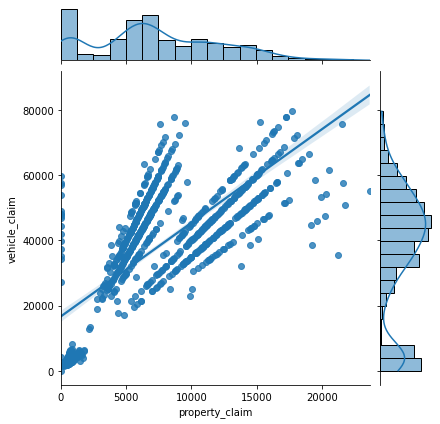

In [26]:
sns.jointplot(data=df,x='property_claim',y='vehicle_claim',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot property_claim and vehicle_claim are two variables in ploting.

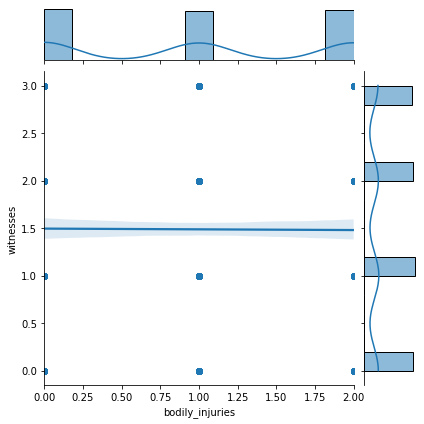

In [27]:
sns.jointplot(data=df,x='bodily_injuries',y='witnesses',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot bodily_injuries and witnesses are two variables in ploting.

In [28]:
sns.jointplot(data=df,x='total_claim_amount',y='injury_claim',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot total_claim_amount and injury_claim are two variables in ploting.

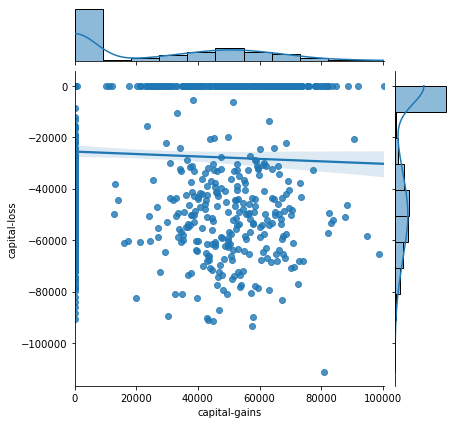

In [29]:
sns.jointplot(data=df,x='capital-gains',y='capital-loss',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot capital-gains and capital-loss are two variables in ploting.

In [30]:
sns.jointplot(data=df,x='incident_hour_of_the_day',y='number_of_vehicles_involved',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot incident_hour_of_the_day and number_of_vehicles_involved are two variables in ploting.

In [31]:
sns.jointplot(data=df,x='umbrella_limit',y='insured_zip',kind='reg')

using jointplot to find the best line or curve that fits the plots.In this plot umbrella_limit and insured_zip are two variables in ploting.

In [32]:
sns.pairplot(df,hue="fraud_reported")

We can check the corelation between dependent and independent features using dataframe.corr() function. This plot pairwise relationships in a dataset.

# checking correlation

In [13]:
cor=df.corr()
cor

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

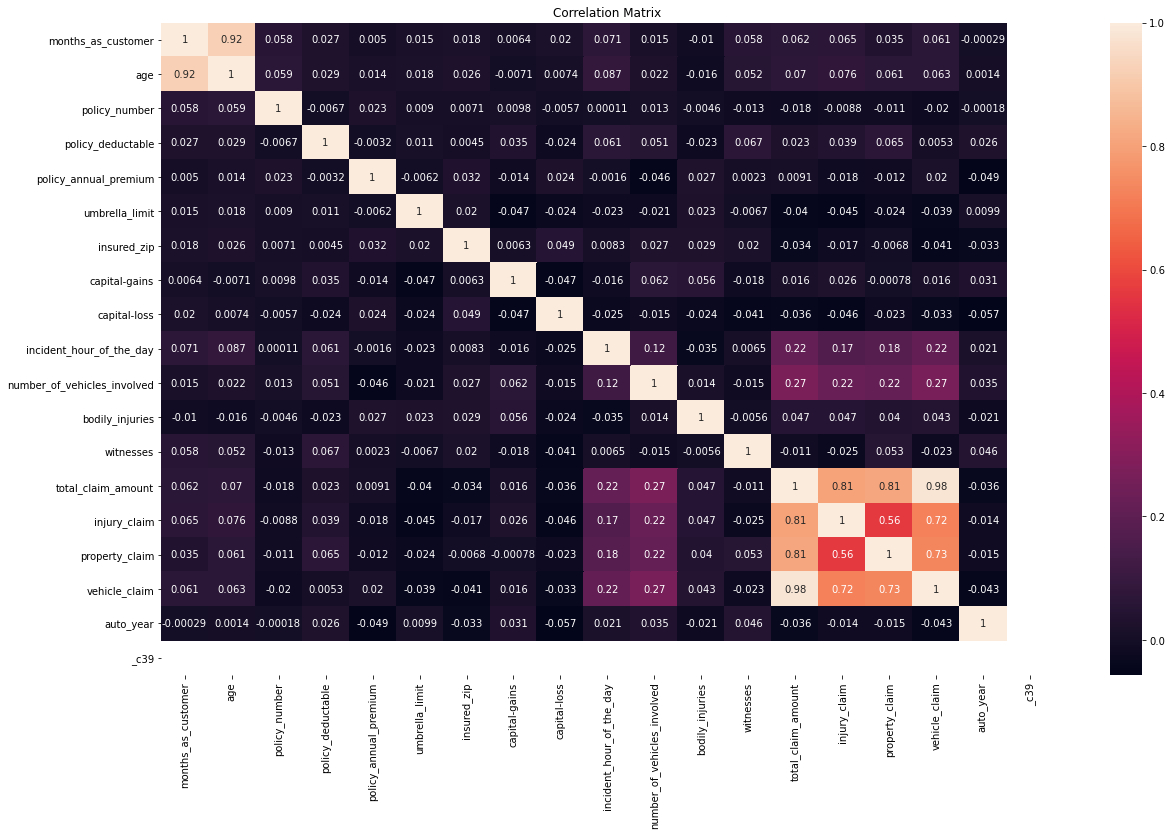

In [14]:
plt.figure(figsize=[20,12])
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

# correlation matrix

In [45]:
corr_matrix=df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


I am finding the correlation value of each column. Their are identify the corrlation of independent variable with target variable "fraud_reported".

# label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [16]:
df["fraud_reported"]=LE.fit_transform(df["fraud_reported"])
df["fraud_reported"].unique()

array([1, 0])

In [17]:
df["policy_bind_date"]=LE.fit_transform(df["policy_bind_date"])
df["policy_bind_date"].unique()

array([532, 821, 186, 766, 181, 385, 112,  60, 132, 772, 795, 891, 634,
       806, 875, 601, 251, 470, 879,  44, 769, 834, 816, 237,  33, 163,
       629, 559, 236, 106, 544, 591,  20, 107, 391, 256, 268,  61, 781,
       823, 246, 931, 920, 397, 161, 663, 233, 547, 199, 305, 295, 627,
        38, 851, 527, 350, 637, 565, 587, 792, 419, 934, 315, 871, 731,
       412, 526, 626, 331, 680, 464, 360, 121, 877, 450,  34, 366, 427,
       656, 831, 380, 114, 447, 662, 452, 805, 104,  30, 461, 443, 231,
       177,  85, 914, 512,   9, 133,  27, 520, 631, 600, 149, 178, 761,
       948, 400, 221, 874, 798, 328, 548,  55, 110, 904, 267, 392, 148,
       947, 649, 235, 714, 611, 394, 628, 825, 289, 113, 399, 530, 459,
       824, 568, 577, 906, 542, 341, 167, 278, 176, 241, 885,  17, 249,
       368, 501, 751, 260, 666, 488, 275, 189, 432, 358, 711, 545, 820,
       430, 888, 323, 743, 679, 404, 282, 123, 689,  76, 886, 477, 709,
       696, 880, 332, 460, 171, 827, 517, 434, 200, 405, 750,  9

In [18]:
df["policy_state"]=LE.fit_transform(df["policy_state"])
df["policy_state"].unique()

array([2, 1, 0])

In [19]:
df["policy_csl"]=LE.fit_transform(df["policy_csl"])
df["policy_csl"].unique()

array([1, 0, 2])

In [20]:
df["insured_sex"]=LE.fit_transform(df["insured_sex"])
df["insured_sex"].unique()

array([1, 0])

In [21]:
df["insured_education_level"]=LE.fit_transform(df["insured_education_level"])
df["insured_education_level"].unique()

array([4, 6, 0, 5, 2, 1, 3])

In [22]:
df["insured_occupation"]=LE.fit_transform(df["insured_occupation"])
df["insured_occupation"].unique()

array([ 2,  6, 11,  1, 12,  9,  7,  8,  3, 10, 13,  5,  0,  4])

In [23]:
df["insured_hobbies"]=LE.fit_transform(df["insured_hobbies"])
df["insured_hobbies"].unique()

array([17, 15,  2,  3,  0,  9,  4,  7, 16, 12, 10, 19, 13,  5, 11, 14,  1,
       18,  6,  8])

In [24]:
df["insured_relationship"]=LE.fit_transform(df["insured_relationship"])
df["insured_relationship"].unique()

array([0, 2, 3, 4, 5, 1])

In [25]:
df["incident_date"]=LE.fit_transform(df["incident_date"])
df["incident_date"].unique()

array([49, 41, 44, 19, 34,  3, 25, 54, 58,  9, 11, 30, 43, 15, 29, 57, 37,
        0, 20, 21, 48, 17, 55, 13, 35, 56, 24, 47,  5, 31, 28, 42, 36, 52,
       33, 53, 22, 23, 12, 39,  4, 40, 16, 46,  2, 27, 38, 18, 51, 45, 59,
        6,  1, 10, 50, 32, 26,  8, 14,  7])

In [26]:
df["incident_type"]=LE.fit_transform(df["incident_type"])
df["incident_type"].unique()

array([2, 3, 0, 1])

In [27]:
df["collision_type"]=LE.fit_transform(df["collision_type"])
df["collision_type"].unique()

array([3, 0, 2, 1])

In [28]:
df["incident_severity"]=LE.fit_transform(df["incident_severity"])
df["incident_severity"].unique()

array([0, 1, 2, 3])

In [29]:
df["authorities_contacted"]=LE.fit_transform(df["authorities_contacted"])
df["authorities_contacted"].unique()

array([4, 2, 1, 3, 0])

In [30]:
df["incident_state"]=LE.fit_transform(df["incident_state"])
df["incident_state"].unique()

array([4, 5, 1, 2, 6, 0, 3])

In [31]:
df["incident_city"]=LE.fit_transform(df["incident_city"])
df["incident_city"].unique()

array([1, 5, 0, 6, 2, 3, 4])

In [32]:
df["incident_location"]=LE.fit_transform(df["incident_location"])
df["incident_location"].unique()

array([996, 628, 685, 669, 220, 891, 539, 276, 429, 224,  61, 553, 633,
       622, 658, 953, 459, 393, 319, 803, 486, 889, 164, 518, 162, 262,
       165, 307, 244, 123, 412, 900, 565, 823, 277, 233, 445, 637, 332,
       264, 427, 520, 245, 635,  78, 360, 720, 879, 630, 557, 461, 139,
       172, 719, 536, 646, 428, 488, 370, 143, 629, 717, 281, 157,  22,
        16, 918, 838, 530, 758, 791, 653, 148, 784, 419, 454, 120, 191,
       780, 617, 225, 681, 462, 149,   0, 721, 948, 122, 503, 698, 827,
        31, 474,  11, 973, 252, 619,  75, 341, 156, 757, 764, 129,   1,
       352, 799, 422, 714, 145, 221, 469, 700,  46, 510, 397, 391, 804,
       314, 400,  71, 825, 124, 458, 733, 138,  67, 760,  19, 892, 763,
       899,   8, 192, 456, 442, 853, 169, 756, 936, 797, 598, 502, 908,
       841, 586,  56, 411, 131, 946, 489, 684, 843, 740,  42, 509, 806,
       366, 593, 304,  62,  76, 728,  88, 931, 183, 750, 894, 433, 767,
       859, 447, 730, 854, 915, 548, 389, 966, 558, 347, 576, 34

In [33]:
df["property_damage"]=LE.fit_transform(df["property_damage"])
df["property_damage"].unique()

array([2, 0, 1])

In [34]:
df["police_report_available"]=LE.fit_transform(df["police_report_available"])
df["police_report_available"].unique()

array([2, 0, 1])

In [35]:
df["auto_make"]=LE.fit_transform(df["auto_make"])
df["auto_make"].unique()

array([10,  8,  4,  3,  0,  9,  1, 12,  5, 11,  2,  7,  6, 13])

In [36]:
df["auto_model"]=LE.fit_transform(df["auto_model"])
df["auto_model"].unique()

array([ 1, 12, 30, 34, 31,  3, 29,  5,  9, 14,  4, 18, 27, 23, 26, 21, 33,
       19, 15, 13, 11,  0,  7, 36, 22, 37, 10, 28, 32,  8,  2,  6, 38, 25,
       16, 20, 24, 35, 17])

In [37]:
df["auto_model"]=LE.fit_transform(df["auto_model"])
df["auto_model"].unique()

array([ 1, 12, 30, 34, 31,  3, 29,  5,  9, 14,  4, 18, 27, 23, 26, 21, 33,
       19, 15, 13, 11,  0,  7, 36, 22, 37, 10, 28, 32,  8,  2,  6, 38, 25,
       16, 20, 24, 35, 17], dtype=int64)

There are 22 columns is object types variable . Using Label encoder these 22 columns is converting into int type.

In [38]:
df.drop('_c39',axis=1,inplace=True)

In [39]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

# outlier removal

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]

In [41]:
new_df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

In [42]:
new_df.shape

(980, 39)

In [43]:
df.shape

(1000, 39)

In [44]:
(20/1000)*100

2.0

outliers are removed in this dataset.

# skewness

In [46]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

In [47]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [48]:
from sklearn.preprocessing import power_transform
new_df=power_transform(x)

new_df=pd.DataFrame(new_df,columns=x.columns)

In [49]:
new_df.skew()

months_as_customer            -0.135661
age                           -0.001945
policy_number                 -0.160374
policy_bind_date              -0.291937
policy_state                  -0.145377
policy_csl                    -0.100769
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
insured_zip                    0.000000
insured_sex                    0.148630
insured_education_level       -0.188564
insured_occupation            -0.239336
insured_hobbies               -0.247798
insured_relationship          -0.160421
capital-gains                  0.038722
capital-loss                   0.090488
incident_date                 -0.264053
incident_type                 -0.088766
collision_type                -0.204204
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
incident_city                 -0.181772
incident_location             -0.288423


skewness has been removed.

 # Handling class imbalance problem by oversampling the minority class

In [50]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [51]:
y_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# standard scaler

In [52]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
scaledX=scaling.fit_transform(df)

In [53]:
scaledX

array([[ 1.07813958,  0.99083647, -0.09595307, ..., -1.64574255,
        -0.1834404 ,  1.74601919],
       [ 0.2089946 ,  0.33407345, -0.79152739, ..., -0.65747047,
         0.31549088,  1.74601919],
       [-0.60800168, -1.08891308,  0.55056594, ...,  0.95970204,
         0.31549088, -0.57273139],
       ...,
       [-0.64276748, -0.54161057,  1.44891961, ..., -0.02857005,
        -1.5139238 , -0.57273139],
       [ 2.20802805,  2.52328351, -0.04786687, ..., -1.28637088,
        -1.18130295, -0.57273139],
       [ 2.19064515,  2.3043625 ,  0.03830297, ..., -0.65747047,
         0.31549088, -0.57273139]])

# finding best random_state

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

# Logistic regression

In [56]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
lg_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.72
[[180   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



# RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.748
[[169  11]
 [ 52  18]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       180
           1       0.62      0.26      0.36        70

    accuracy                           0.75       250
   macro avg       0.69      0.60      0.60       250
weighted avg       0.72      0.75      0.71       250



# DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt_accu=accuracy_score(y_test,pred)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.832
[[160  20]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       180
           1       0.71      0.69      0.70        70

    accuracy                           0.83       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.83      0.83      0.83       250



# SVC

In [59]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.72
[[180   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



# AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
ad_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.792
[[169  11]
 [ 41  29]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       180
           1       0.72      0.41      0.53        70

    accuracy                           0.79       250
   macro avg       0.76      0.68      0.70       250
weighted avg       0.78      0.79      0.77       250



In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn_accu=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.652
[[160  20]
 [ 67   3]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       180
           1       0.13      0.04      0.06        70

    accuracy                           0.65       250
   macro avg       0.42      0.47      0.43       250
weighted avg       0.54      0.65      0.58       250



In [84]:
results = pd.DataFrame({
    'Model': ['SVC','Random Forest',  'Decision Tree','AdaBoostClassifier',
             'LogisticRegression','KNeighborsClassifier'],
               
    
    'Score': [svc_accu,  
             rf_accu,  dt_accu,   
              ad_accu,lg_accu,knn_accu]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

Model
Score                      
0.832         Decision Tree
0.792    AdaBoostClassifier
0.748         Random Forest
0.720                   SVC
0.720    LogisticRegression
0.652  KNeighborsClassifier

# cross validation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.787


In [64]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7780000000000001


In [65]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.7939999999999999


In [66]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.751


In [67]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7529999999999999


In [85]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.704


# AUC-ROC curve

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
#Decision Tree classifier
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [73]:
y_pred_prob

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1.

In [74]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [75]:
fpr

array([0.        , 0.11111111, 1.        ])

In [76]:
tpr

array([0.        , 0.68571429, 1.        ])

In [77]:
thresholds

array([2., 1., 0.])

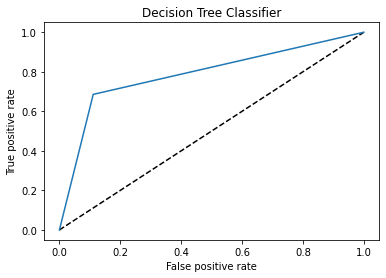

0.7873015873015873

In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# hyper parameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [89]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [90]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [91]:
CV_rfc.best_score_

0.7866666666666667

In [92]:
#DecisionTreeClassifier
parameter = {'max_depth' : np.arange(2,10),
              'criterion':['gini','entropy']}

In [93]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [95]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [96]:
GCV.best_score_

0.836

In [97]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1]}

In [98]:
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [99]:
search.fit(x,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [100]:
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [101]:
search.best_score_

0.8109999999999999

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

In [103]:
grid.best_score_

0.764

In [104]:
grid_params={ 'n_neighbors':[3,5,11,19],
            'weights': ['uniform','distance'],
            'metric':['éuclidean','manhattan']}

In [105]:
gs=GridSearchCV(knn,grid_params,verbose=1,cv=3,n_jobs=-1)

In [106]:
gs_result=gs.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [107]:
gs_result.best_score_

0.7626666666666667

In [108]:
gs_result.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [109]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [ ]:
 Decision Tree Classifier is giving Maximum Accuracy as compare to other classification algorithm.Hence  Decision Tree Classifier is the best model of this dataset.

# saving the model

In [110]:
import pickle
filename='Automobile_insurence_fraud.pkl'
pickle.dump(dt,open(filename,'wb'))

# conclusion

In [112]:
loaded_model=pickle.load(open('Automobile_insurence_fraud.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.832


In [113]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["predicted","original"])

In [114]:
conclusion

0    1    2    3    4    5    6    7    8    9    ...  240  241  \
predicted    0    0    0    0    0    0    0    0    0    0  ...    0    1   
original     0    0    0    0    0    0    0    0    0    0  ...    0    0   

           242  243  244  245  246  247  248  249  
predicted    0    0    0    0    0    0    1    1  
original     0    0    0    0    0    0    0    1  

[2 rows x 250 columns]